### Loading The Dataset
- Use `sklearn.datasets` function **`load_diabetes`**
- We added `%matplotlib inline` to enable Matplotlib in this notebook.

In [108]:
%matplotlib inline
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(scaled=False)

### Displaying the Dataset's Description

In [109]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

* Confirm number of **samples/features**, number of **targets**, **feature names**

In [110]:
diabetes.data.shape

(442, 10)

In [111]:
diabetes.target.shape

(442,)

In [112]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### Exploring the Data with pandas

In [113]:
import pandas as pd

pd.set_option('display.precision', 4)  # 4 digit precision for floats

# Used for command line outputs in IPython interactive mode
pd.set_option('display.max_columns', 11)  # display up to 9 columns in DataFrame outputs

pd.set_option('display.width', None)  # auto-detect the display width for wrapping

* Second statement adds a **`DataFrame` column** for **disease progression**

In [114]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['diseaseProgression'] = pd.Series(diabetes.target)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diseaseProgression
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


* Calculate **`DataFrame`’s summary statistics**
* Output is **left-to-right scrollable in Jupyter** if it does not fit in your screen width

In [115]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diseaseProgression
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,48.5181,1.4683,26.3758,94.6470,189.1403,115.4391,49.7885,4.0702,4.6414,91.2602,152.1335
std,13.1090,0.4996,4.4181,13.8313,34.6081,30.4131,12.9342,1.2904,0.5224,11.4963,77.0930
min,19.0000,1.0000,18.0000,62.0000,97.0000,41.6000,22.0000,2.0000,3.2581,58.0000,25.0000
25%,38.2500,1.0000,23.2000,84.0000,164.2500,96.0500,40.2500,3.0000,4.2767,83.2500,87.0000
50%,50.0000,1.0000,25.7000,93.0000,186.0000,113.0000,48.0000,4.0000,4.6200,91.0000,140.5000
75%,59.0000,2.0000,29.2750,105.0000,209.7500,134.5000,57.7500,5.0000,4.9972,98.0000,211.5000
max,79.0000,2.0000,42.2000,133.0000,301.0000,242.4000,99.0000,9.0900,6.1070,124.0000,346.0000


### Visualizing the Features

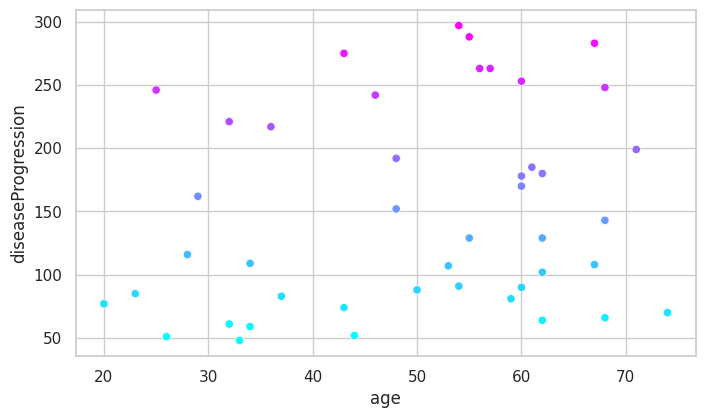

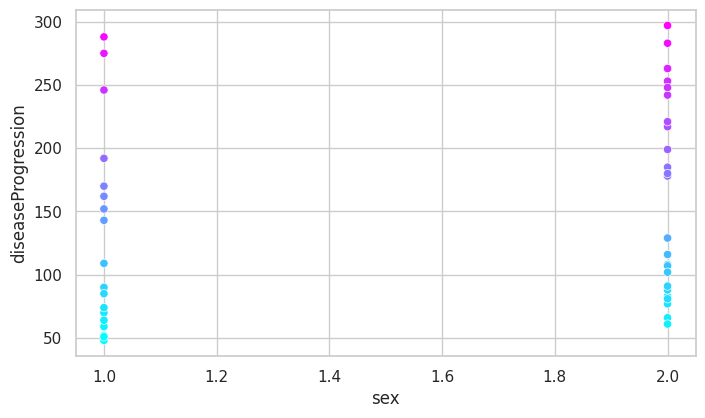

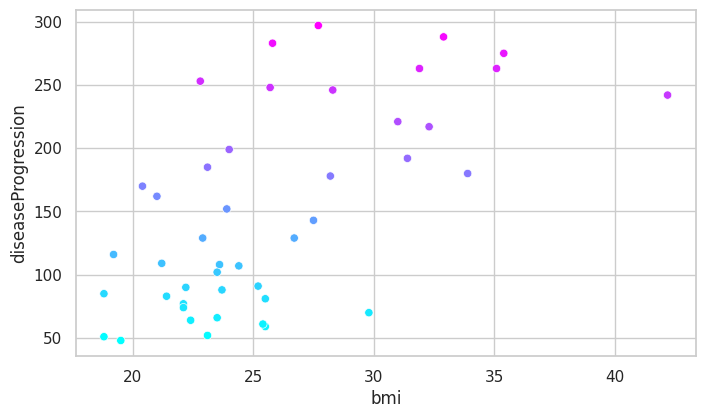

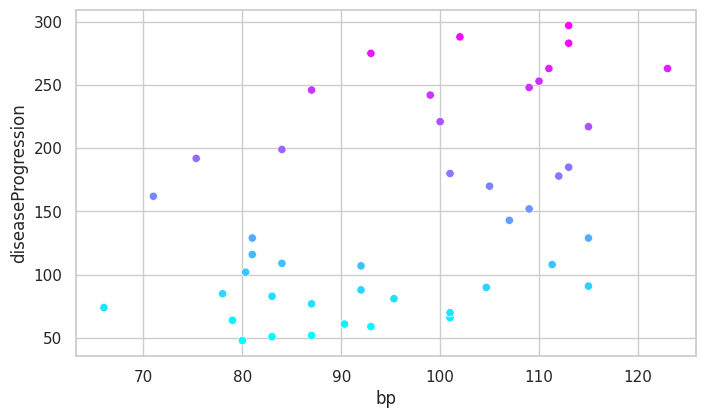

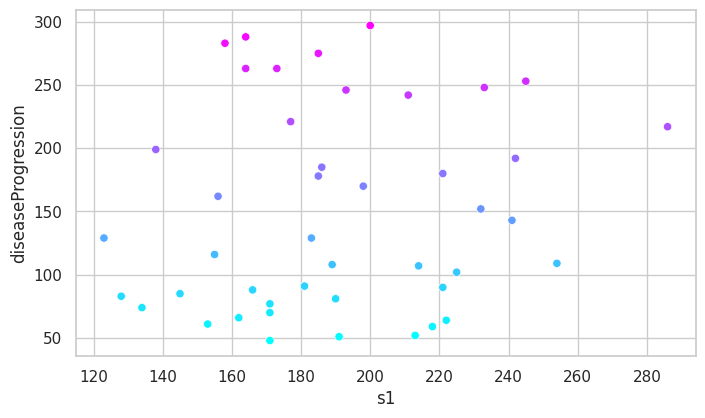

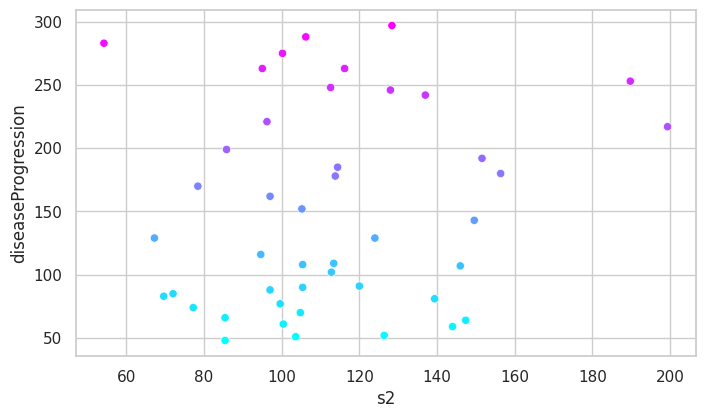

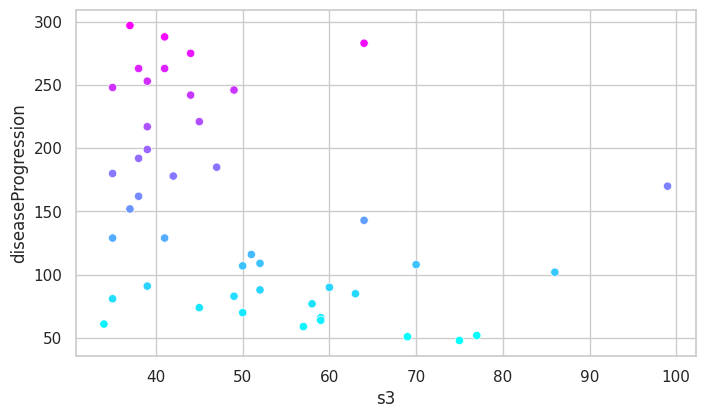

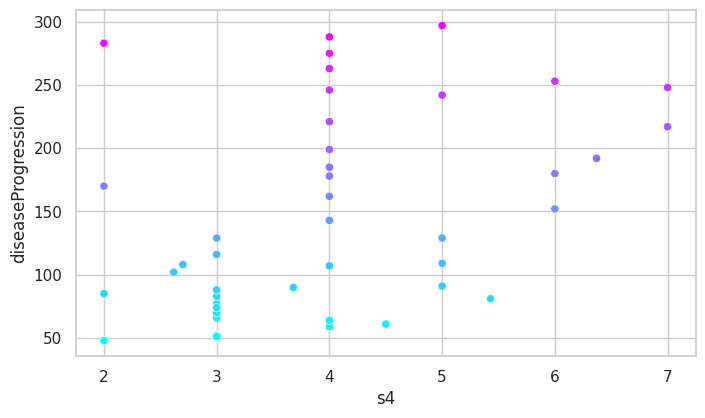

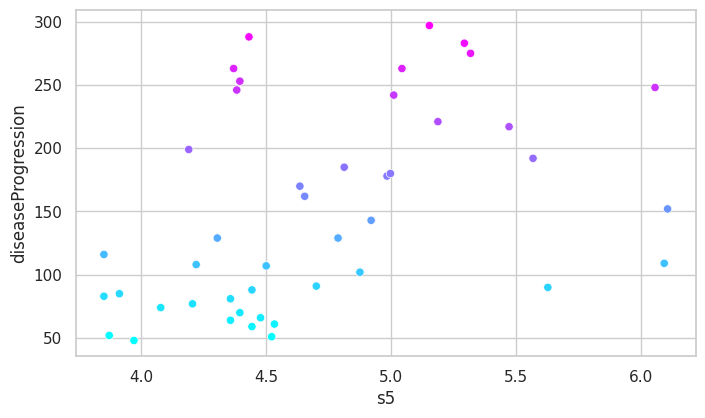

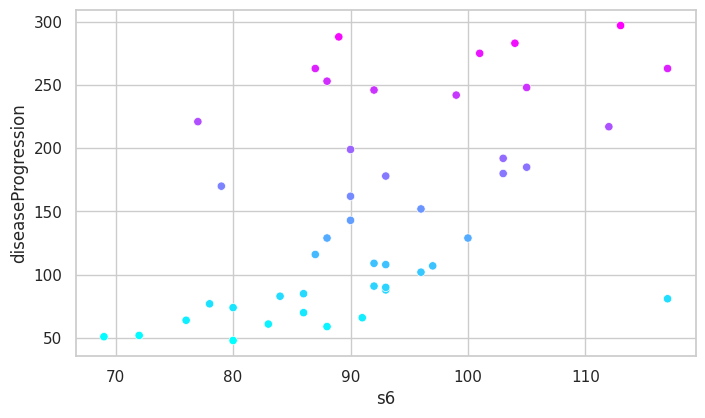

In [116]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1)
sns.set_style('whitegrid')

for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature,
                    y='diseaseProgression', hue='diseaseProgression',
                    palette='cool', legend=False)

### Splitting the Data for Training and Testing Using `train_test_split`

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

In [118]:
X_train.shape

(331, 10)

In [119]:
X_test.shape

(111, 10)

### Training the Model
* **`LinearRegression`** tries to use **all** features in a dataset’s `data` array
    * **error** if any features are **categorical**  
    * Categorical data must be preprocessed into numerical data or excluded
* **Scikit-learn’s bundled datasets** are already in the **correct format** for training

In [120]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [121]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -0.21875079007446366
       sex: -25.399153925226912
       bmi: 5.637640600609795
        bp: 1.0690516030902506
        s1: -0.46254234070692135
        s2: 0.21503794076694227
        s3: -0.48280715720259226
        s4: -0.04240805233353062
        s5: 56.72900990425518
        s6: 0.25045853252025907


In [122]:
linear_regression.intercept_

np.float64(-249.03105144135895)

### Testing the Model
- Use the estimator’s `predict` method

In [123]:
predicted = linear_regression.predict(X_test)

expected = y_test

predicted[:5]  # first 5 predictions

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [124]:
expected[:5]   # first five targets

array([ 79.,  55., 109., 178.,  39.])

### Visualizing the Expected vs. Predicted Values
* Create a `DataFrame` containing columns for the expected and predicted values:

In [125]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

* Plot the data as a scatter plot with the **expected (target) values** along the x-axis and the **predicted values** along the **y**-axis:

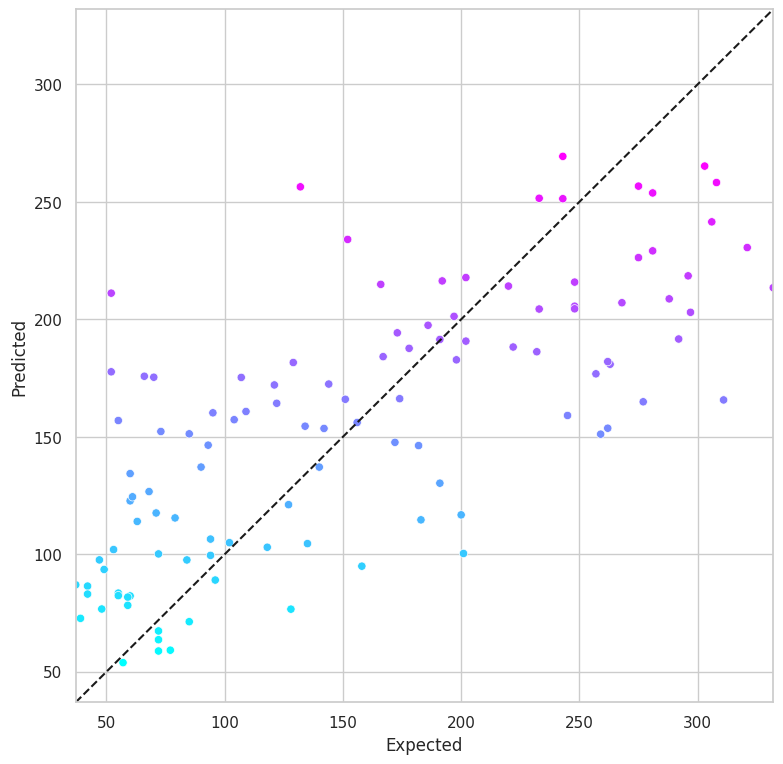

In [133]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

### Regression Model Metrics
* **Metrics for regression estimators** include **coefficient of determination** (**$R^{2}$ score**; 0.0-1.0)
    * **1.0** &mdash; estimator **perfectly predicts** the **dependent variable’s value**, given independent variables' values
    * **0.0** &mdash; **model cannot make predictions with any accuracy**, given independent variables’ values
* Calculate with arrays representing the **expected** and **predicted results**

In [127]:
from sklearn import metrics
metrics.r2_score(expected, predicted)

0.5322429620529405

### Choosing the Best Model
* **Try several estimators** to determine whether any **produces better results** than `LinearRegression`
* [Information about estimators used here](https://scikit-learn.org/stable/modules/linear_model.html)

In [128]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

* Run the estimators using **k-fold cross-validation**
* **`cross_val_score` argument `scoring='r2'`** &mdash; report **$R^{2}$ scores** for **each fold**
    * **1.0 is best**, so **`LinearRegression`** and **`Ridge`** appear to be **best models** for this dataset

In [129]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=diabetes.data, y=diabetes.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=0.452
           Lasso: mean of r2 scores=0.471
           Ridge: mean of r2 scores=0.475
